**линейная регрессия, градиентный спуск**

Евгений Борисов  <esborisov@sevsu.ru>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples=500

X = np.linspace(-1,1,n_samples).reshape(-1,1)
y = np.sin((X)*2.9)+np.random.rand(n_samples).reshape(-1,1)

y = y.flatten()

X.shape,y.shape

((500, 1), (500,))

In [3]:
# from sklearn.preprocessing   import StandardScaler
# X = StandardScaler().fit(X).transform(X)

# X.shape, y.shape

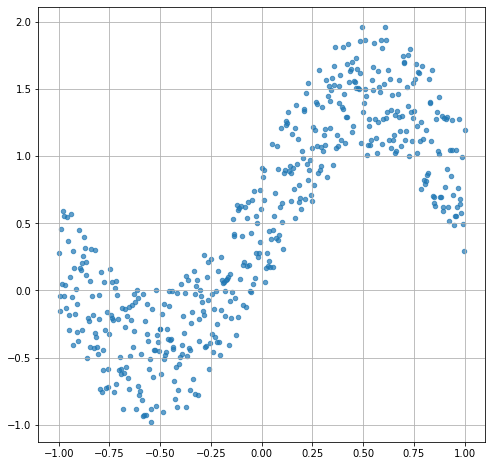

In [4]:
# рисуем исходные данные
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [5]:
# # масштабируем признаки в [-1,1]
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

In [6]:
Xp = np.hstack([np.ones([n_samples,1]),X]) # добавляем столбец из единиц (свободный член)

---

In [7]:
def msqe(y,o): 
    d = y-o 
    return d.dot(d.T)/len(y)

In [8]:
def model(x,w): 
    return x.dot(w)

In [9]:
# инициализация параметров
n_param = Xp.shape[1]
# w = np.random.rand(n_param)
w = np.array( [0] + [1]*(n_param-1) )
w.shape

(2,)

In [10]:
%%time

# метод градиентного спуска

lr = 1e-1 # скорость обучени
n_samples = len(y) # количество примеров
n_epoch = 100 # максимальное число циклов обучения
min_loss = .25 # порог минимальной ошибки

loss_history = [ msqe(y,model(Xp,w)) ]
    
for i in range(n_epoch):
    o = model(Xp,w) # выход
    loss = msqe(y,o)
    loss_history.append(loss)
    
    if loss < min_loss: # проверяем достижение порога
        print('step %i/%i: loss threshold %.03f'%(i+1,n_epoch,loss))
        break
    
    g = Xp.T.dot(o-y) # изменение весов
    g /= np.abs(g).max()
    
    w = w - lr*g # корректируем параметры
    


step 5/100: loss threshold 0.226
CPU times: user 2.39 ms, sys: 0 ns, total: 2.39 ms
Wall time: 1.58 ms


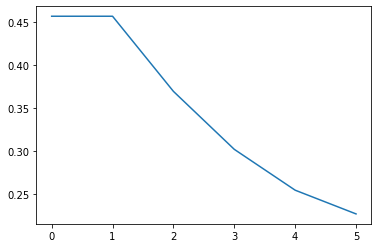

In [11]:
plt.plot(loss_history)

In [12]:
min(loss_history)

0.22637124273697726

In [13]:
# вектор-столбец крайние значения признака
xx = np.array([ X.min(), X.max(), ]).reshape((2,1)) 

# значение регрессии для xx
yy = model(np.hstack([np.ones([2,1]),xx]),w )


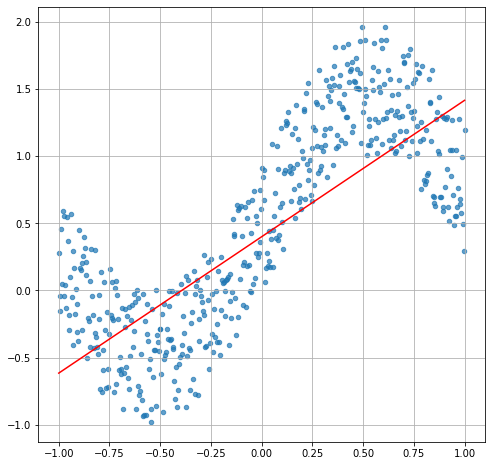

In [14]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()